# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In terms of this project I am investigating the TMDb Movies Dataset provided by Kaggle and pre-cleaned in advance by Udacity. I am curious to see whether there are dependencies between different values, how some of them influence better rating or what genres were more popular throughout the years, etc.

### Questions to answer
<ul>
<li>Amount of released films throughout the years</li>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>Actors with the most impressive filmography and popularity</li>
<li>Production companies with highest budget</li>
</ul>

In [1]:
# Setting up import statements for all of the packages that I plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Loading data and conducting first visual analysis

df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

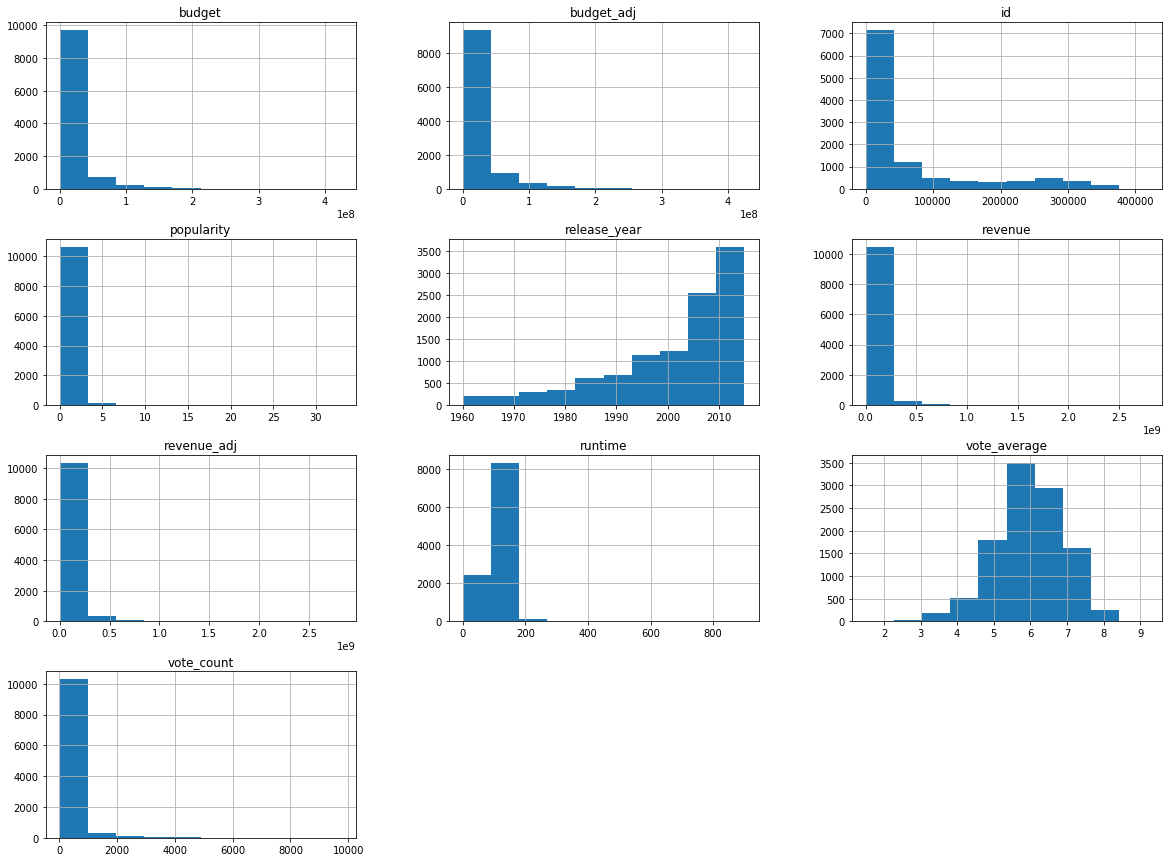

In [4]:
df.hist(figsize = (20,15));

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
sum(df.duplicated())

1

In [9]:
df.isnull().sum(), df.isin([0]).sum()

(id                         0
 imdb_id                   10
 popularity                 0
 budget                     0
 revenue                    0
 original_title             0
 cast                      76
 homepage                7930
 director                  44
 tagline                 2824
 keywords                1493
 overview                   4
 runtime                    0
 genres                    23
 production_companies    1030
 release_date               0
 vote_count                 0
 vote_average               0
 release_year               0
 budget_adj                 0
 revenue_adj                0
 dtype: int64, id                         0
 imdb_id                    0
 popularity                 0
 budget                  5696
 revenue                 6016
 original_title             0
 cast                       0
 homepage                   0
 director                   0
 tagline                    0
 keywords                   0
 overview                 

Describe function as well as histograms show that columns budget and revenue have many zero values in them, therefore should be manipulated carefully. Dropping those lines could reduce integrity of the dataset and impact the analysis results. It was decided to replace zeros with mean values.

Also there are a few lines with null values and zeros in columns cast, director, keywords, runtime, genre, production_companies which can be dropped.

Columns like 
'imdb_id','homepage','tagline','overview','release_date','budget_adj','revenue_adj' 
might not have any impact on the popularity or revenue of the movie and therefore can be dropped. 

### Data Cleaning

Lines in columns budget and revenue having zeros aren't actually missing values, this may indicate that the data was collected incorrectly. It was decided to keep those lines in columns budget and revenue, but before replace zeros with mean values to keep the integrity of the initial dataset and contribute to better analysis.

In [10]:
# Before calculating mean it is needed to convert zeros into null values

df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)

In [11]:
# Calculate mean value in budget and revenue columns

budget_mean = df['budget'].mean(skipna = True)
budget_mean

30739432.899226304

In [12]:
revenue_mean = df['revenue'].mean(skipna = True)
revenue_mean

89220658.32474227

In [13]:
# Replacing null values with means in columns budget and revenue

df['budget'].replace(np.NAN, budget_mean, inplace = True)
df['revenue'].replace(np.NAN, revenue_mean, inplace = True)

In [14]:
# Drop null values in columns cast, director, keywords, genres, production_companies and zeros in runtime, as there are 
# not many of them and this probably will not heavily impact the integrity of the dataset.

df['runtime'].replace(0, np.NAN, inplace = True)
col2 = ['cast','director','keywords','runtime','genres','production_companies']
df.dropna(axis = 0, how = 'any', subset = col2, inplace = True)


In [15]:
# Drop duplicates:
 
df.drop_duplicates(inplace = True) #keep = 'first', 

In [16]:
# Drop unnecessary for the analysis columns:

col = ['imdb_id','homepage','tagline','overview','release_date','budget_adj','revenue_adj']
df.drop(col, axis = 1, inplace = True)

In [17]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8659.000000,8659.000000,8.659000e+03,8.659000e+03,8659.000000,8659.000000,8659.000000,8659.000000
mean,56809.128999,0.742213,3.168901e+07,9.177104e+07,103.899065,264.399931,6.004123,2000.118489
std,85990.250531,1.087915,2.944567e+07,1.201576e+08,26.050934,635.415099,0.893356,13.220592
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,9814.500000,0.250228,1.600000e+07,3.200389e+07,91.000000,21.000000,5.500000,1993.000000
50%,16194.000000,0.449535,3.073943e+07,8.922066e+07,100.000000,54.000000,6.100000,2004.000000
75%,53608.000000,0.843159,3.073943e+07,8.922066e+07,113.000000,200.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000


In [18]:
df.info(), df.isnull().sum(), df.isin([0]).sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8659 entries, 0 to 10865
Data columns (total 14 columns):
id                      8659 non-null int64
popularity              8659 non-null float64
budget                  8659 non-null float64
revenue                 8659 non-null float64
original_title          8659 non-null object
cast                    8659 non-null object
director                8659 non-null object
keywords                8659 non-null object
runtime                 8659 non-null float64
genres                  8659 non-null object
production_companies    8659 non-null object
vote_count              8659 non-null int64
vote_average            8659 non-null float64
release_year            8659 non-null int64
dtypes: float64(5), int64(3), object(6)
memory usage: 1014.7+ KB


(None, id                      0
 popularity              0
 budget                  0
 revenue                 0
 original_title          0
 cast                    0
 director                0
 keywords                0
 runtime                 0
 genres                  0
 production_companies    0
 vote_count              0
 vote_average            0
 release_year            0
 dtype: int64, id                      0
 popularity              0
 budget                  0
 revenue                 0
 original_title          0
 cast                    0
 director                0
 keywords                0
 runtime                 0
 genres                  0
 production_companies    0
 vote_count              0
 vote_average            0
 release_year            0
 dtype: int64)

In [19]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


Some of the columns provide several values separated by "|" symbol. I've made a function to separate them and store to a different dataframe. 

In [20]:
def separator(data):
    return data.str.split('|', expand = True)

genres = separator(df['genres'])
keywords = separator(df['keywords'])
cast = separator(df['cast'])
production_companies = separator(df['production_companies'])

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Amount of released films throughout the years

In [21]:
# Let's add some necessary information from cleaned table to genres table

genres['id'] = df['id']
genres['release_year'] = df['release_year']

In [22]:
movies_per_year = genres.groupby('release_year')['id'].count()
movies_per_year.tail(5)

release_year
2011    383
2012    387
2013    454
2014    518
2015    437
Name: id, dtype: int64

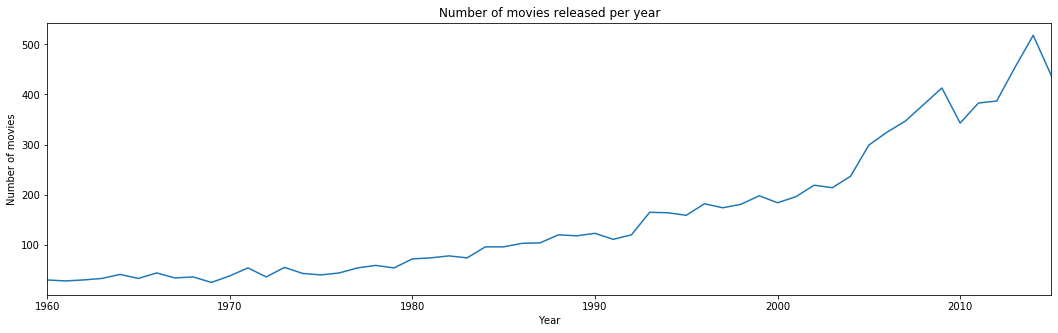

In [23]:
movies_per_year.plot(kind = 'line', figsize = (18,5))
plt.title('Number of movies released per year')
plt.xlabel('Year')
plt.ylabel('Number of movies');

The tendency can be clearly seen. However the biggest amount of movies (518) were released in 2014.

### Research Question 2: What genres are most popular from year to year.

There might be different definitions for popularity. In this section I am defining popularity as a largest number of most released movie genres in each year.

In [24]:
genres.head()

,0,1,2,3,4,id,release_year
0,Action,Adventure,Science Fiction,Thriller,None,135397,2015
1,Action,Adventure,Science Fiction,Thriller,None,76341,2015
2,Adventure,Science Fiction,Thriller,None,None,262500,2015
3,Action,Adventure,Science Fiction,Fantasy,None,140607,2015
4,Action,Crime,Thriller,None,None,168259,2015


In [25]:
years = sorted(genres.release_year.unique()) #Make a list of all years

most_popular = [] # Create first an empty list for Year and corresponding Genre

for year in years:
    a = genres[genres['release_year'] == year] # Choose specific year
    b = a.drop(['release_year','id'], axis = 1) # Drop unused columns 
    c = b.stack().value_counts().idxmax() # Stack all genres in this year, count values and store max count
    
    most_popular.append((year,c))
    
df_mp = pd.DataFrame(most_popular, columns = ['Release year','Genre']) # Convert list to DataFrame

In [26]:
df_mp

,Release year,Genre
0,1960,Drama
1,1961,Drama
2,1962,Drama
3,1963,Drama
4,1964,Drama
5,1965,Drama
6,1966,Comedy
7,1967,Comedy
8,1968,Drama
9,1969,Drama


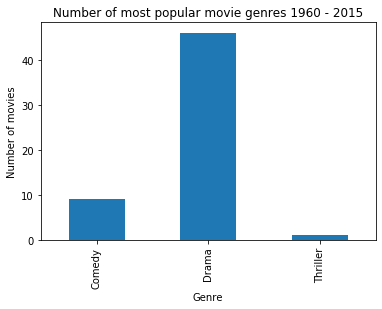

In [27]:
df_mp.groupby(['Genre']).count().plot(kind = 'bar', legend=False)
plt.title('Number of most popular movie genres 1960 - 2015')
plt.xlabel('Genre')
plt.ylabel('Number of movies');

From the resulting table and the plot it can be seen that Dramas, Comedies and Thrillers are the most popular movie genres produces over the years. Dramas have a big advantage over other genres.

Let's see the overall distribution of movie genres released throughout the years.

In [28]:
genres_distr = genres.drop(['id','release_year'], axis = 1).stack()

In [29]:
genres_distr.value_counts()

Drama              3932
Comedy             3048
Thriller           2461
Action             2021
Romance            1414
Horror             1337
Adventure          1270
Crime              1200
Science Fiction    1028
Family              946
Fantasy             762
Mystery             702
Animation           512
Music               308
History             287
Documentary         268
War                 235
Western             154
TV Movie            114
Foreign              90
dtype: int64

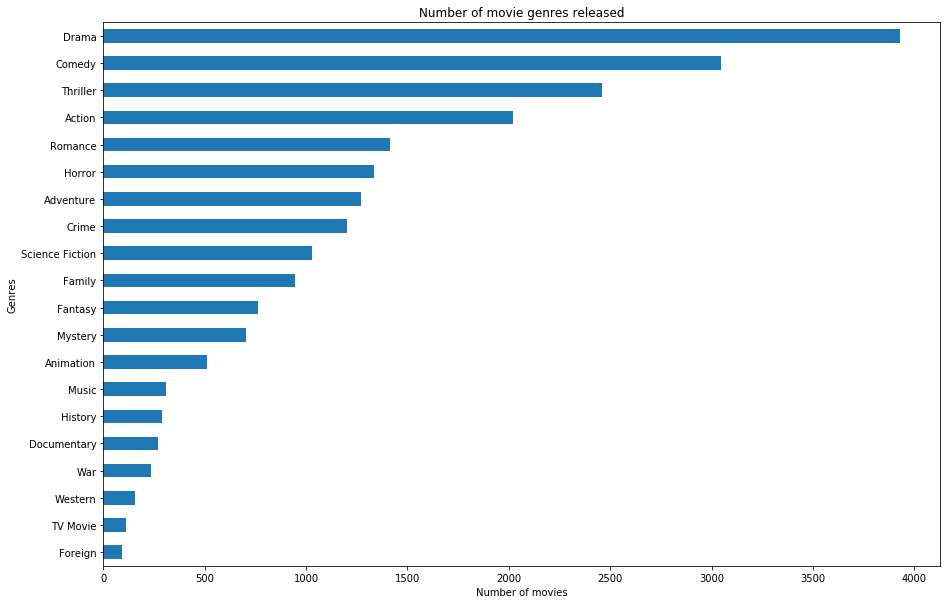

In [30]:
genres_distr.value_counts(ascending = True).plot(kind = 'barh', figsize = (15,10))
plt.title('Number of movie genres released')
plt.xlabel('Number of movies')
plt.ylabel('Genres');

### Research Question 3: What kinds of properties are associated with movies that have high revenues?

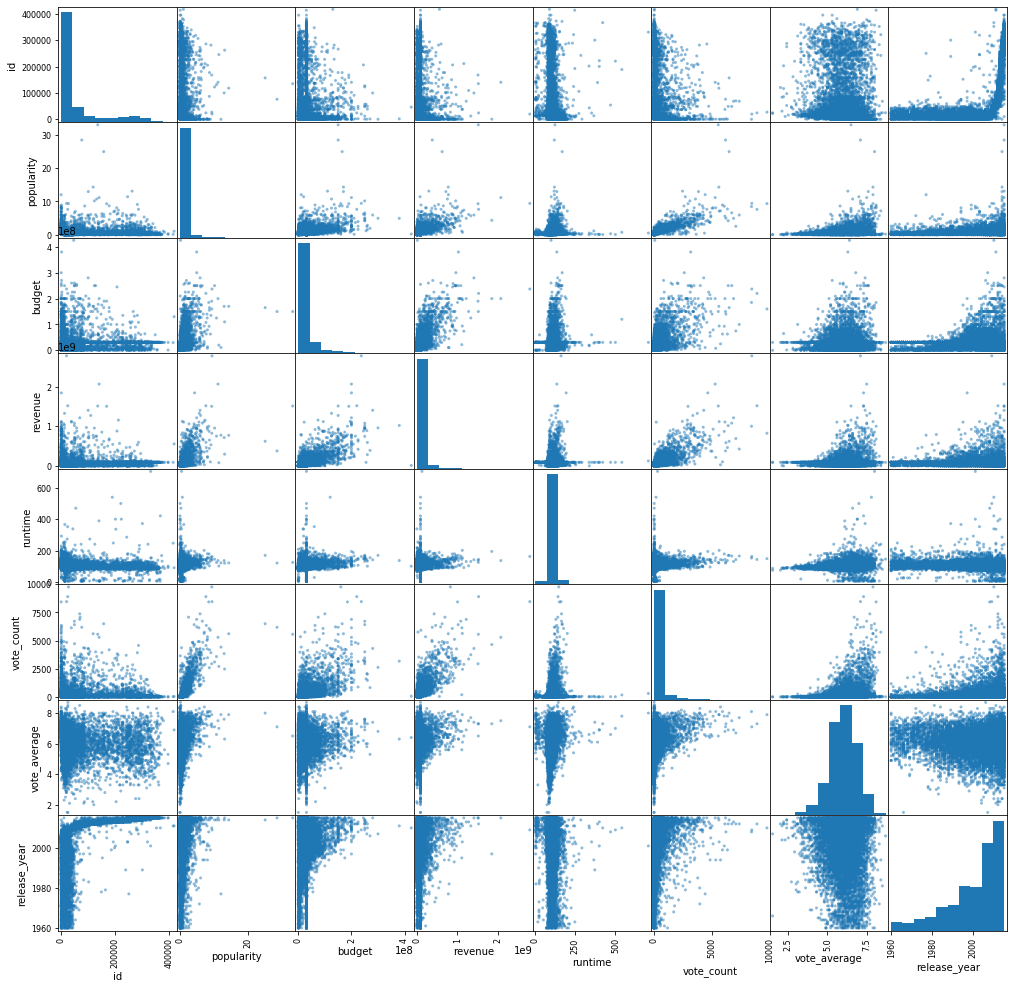

In [31]:
pd.plotting.scatter_matrix(df, figsize = (17,17));

In [32]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,0.031423,-0.036223,-0.019787,-0.087195,-0.005007,-0.069800,0.494715
popularity,0.031423,1.000000,0.446523,0.583809,0.164462,0.801513,0.244866,0.137369
budget,-0.036223,0.446523,1.000000,0.649055,0.169289,0.554279,0.057557,0.165960
revenue,-0.019787,0.583809,0.649055,1.000000,0.141756,0.724354,0.139146,0.088636
runtime,-0.087195,0.164462,0.169289,0.141756,1.000000,0.197110,0.202590,-0.125538
vote_count,-0.005007,0.801513,0.554279,0.724354,0.197110,1.000000,0.288310,0.150194
vote_average,-0.069800,0.244866,0.057557,0.139146,0.202590,0.288310,1.000000,-0.123605
release_year,0.494715,0.137369,0.165960,0.088636,-0.125538,0.150194,-0.123605,1.000000


Based on scatter plot matrix and correlation matrix above it can be seen that high revenues is mostly dependent from the following 3 features:
- vote_count (has a correlation coefficient of 0.76);
- budget (has a correlation coefficient of 0.68);
- popularity (has a correlation coefficient of 0.62)

### Research Question 4: Actors with the most impressive filmography and popularity

In [33]:
cast.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [34]:
top_10_cast = cast.stack().value_counts().head(10)
top_10_cast

Robert De Niro       68
Samuel L. Jackson    65
Bruce Willis         61
Nicolas Cage         59
Michael Caine        50
Robin Williams       48
John Goodman         47
Morgan Freeman       47
Tom Hanks            46
John Cusack          46
dtype: int64

The table above shows top 10 actors with impressive filmography. But still we cannot call them famous or popular, before we need to see how popular were the films with them. Let's see how this list changes as we add popularity feature of the movie into consideration.

In [35]:
cast['popularity'] = df['popularity']
cast.head()

,0,1,2,3,4,popularity
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,32.985763
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,28.419936
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,13.112507
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,11.173104
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,9.335014


In [36]:
melted_cast = pd.melt(cast, id_vars = 'popularity',value_vars = [0,1,2,3,4], value_name = 'actor')

In [37]:
melted_cast.query('popularity == 32.985763')

,popularity,variable,actor
0,32.985763,0,Chris Pratt
8659,32.985763,1,Bryce Dallas Howard
17318,32.985763,2,Irrfan Khan
25977,32.985763,3,Vincent D'Onofrio
34636,32.985763,4,Nick Robinson


In [38]:
melted_cast.groupby('actor').sum().sort_values(by = 'popularity', ascending = False).head(10)

,popularity
actor,
Samuel L. Jackson,91.868694
Michael Caine,82.634623
Harrison Ford,79.035897
Bruce Willis,77.058590
Robert De Niro,76.546720
Brad Pitt,74.716607
Johnny Depp,71.155011
Scarlett Johansson,68.154523
Tom Hardy,66.737589


As we can see now the list looks different, and now we have one lady onboard.

### Research Question 5: Production companies with highest budget

Let's firtly see the top 10 of the most productive companies

In [39]:
top_10_prod = production_companies.stack().value_counts().head(10)
top_10_prod

Warner Bros.                              495
Universal Pictures                        490
Paramount Pictures                        419
Twentieth Century Fox Film Corporation    275
Columbia Pictures                         268
New Line Cinema                           210
Metro-Goldwyn-Mayer (MGM)                 209
Walt Disney Pictures                      191
Touchstone Pictures                       168
Columbia Pictures Corporation             156
dtype: int64

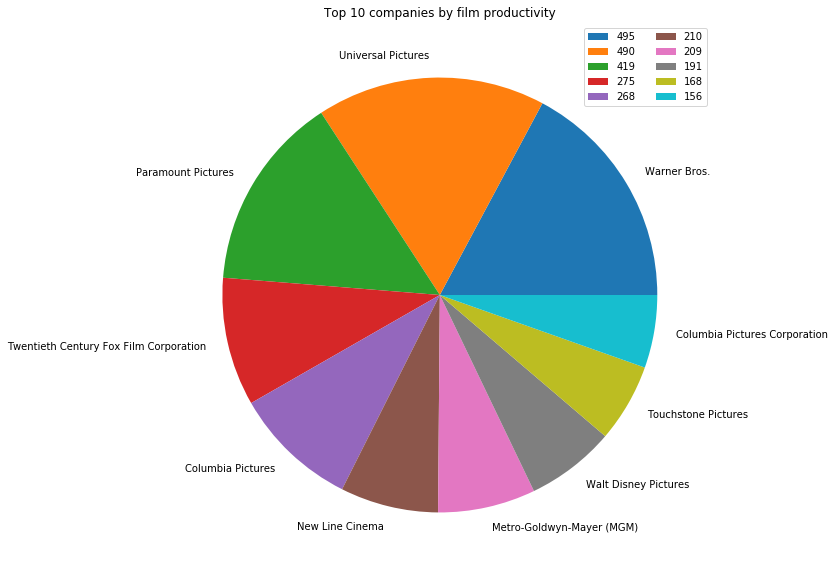

In [40]:
top_10_prod.plot(kind = 'pie', figsize = (11,10))
plt.title('Top 10 companies by film productivity')
plt.ylabel('')
plt.legend(top_10_prod, loc = 'upper right', ncol = 2);

Now let's include budget column into equation and see if the same companies have the highest budget

In [41]:
production_companies['budget'] = df['budget']
production_companies.head()

,0,1,2,3,4,budget
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,150000000.0
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,150000000.0
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None,110000000.0
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None,200000000.0
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films,190000000.0


In [42]:
melted_comp = pd.melt(production_companies, id_vars = 'budget',value_vars = [0,1,2,3,4], value_name='company')

melted_comp.head()

,budget,variable,company
0,150000000.0,0,Universal Studios
1,150000000.0,0,Village Roadshow Pictures
2,110000000.0,0,Summit Entertainment
3,200000000.0,0,Lucasfilm
4,190000000.0,0,Universal Pictures


In [43]:
top_10_comp_melted = melted_comp.groupby('company').sum().sort_values(by = 'budget', ascending = False).head(10)
top_10_comp_melted

,budget
company,
Warner Bros.,2.420559e+10
Universal Pictures,1.955334e+10
Paramount Pictures,1.731944e+10
Columbia Pictures,1.326142e+10
Walt Disney Pictures,1.250325e+10
Twentieth Century Fox Film Corporation,1.227697e+10
New Line Cinema,7.759011e+09
Touchstone Pictures,6.820020e+09
Metro-Goldwyn-Mayer (MGM),6.776901e+09


In [44]:
budgets_labels = (top_10_comp_melted['budget'] / 1000000000).astype(int).astype(str) + ' billions'

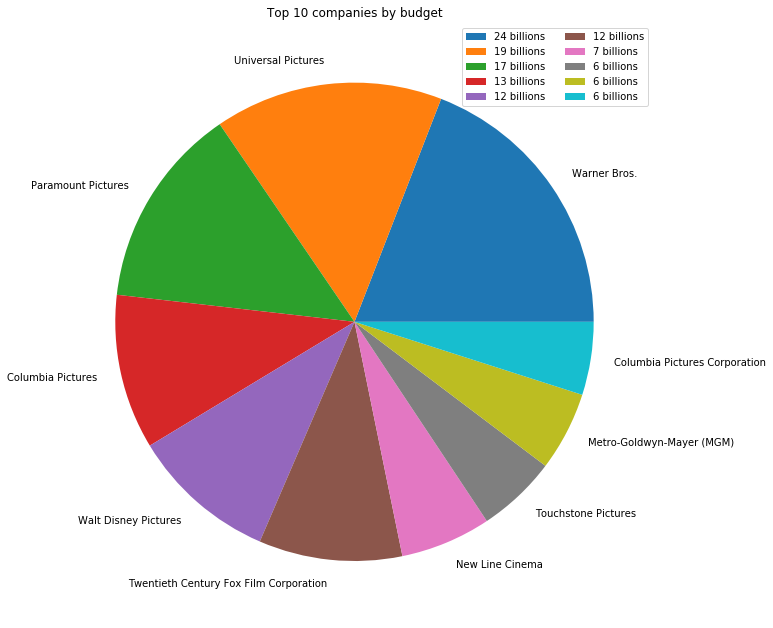

In [45]:
top_10_comp_melted.plot(kind = 'pie', y='budget', figsize = (15,11))
plt.title('Top 10 companies by budget')
plt.ylabel('')
plt.legend(budgets_labels, loc = 'upper right', ncol=2);

<a id='conclusions'></a>
## Conclusions

In the first research question it was interesting to see how the amount of films produced changed over time. Eventhough we droppped a few lines, still the clear upcomming tendency can be seen. The amount of films produced has drastically increased, not more than 100 movies were produces up until mid 80's, and in 2014 alone more than 500 films were produced. As we all are entering content era, the trend will continue.

The second research question revealed interesting fact for me, I never thought that dramas are almost always the most popular movie genre from 1960 up until now.

The third question presents pretty much obvious results. Revenues of the film are mainly dependent from three factors: Votes, Budget and Popularity, with correlations 0.76, 0.68 and 0,62 accordingly.

In fifth research question it was interesting to observe the fact that the actor taking a role in the film not necesseraly brings the film to success, as an example Robert De Niro has played the most (68 movies) but those movies occupy only 5th place in popularity by actor chart.

In the end it was nice to look at the "whales" of the film industry. Despite getting quite locigal result: the more money company spends, the more films is can produce, table and pie chart showed that the leading companies produced almost twice as much films as the next followers. 

**Limitations: After cleaning we got 8659 rows out of original 10866 rows, which means more than 20% of rows had to be dropped due to having NaN or zero values in them.  5696 and 6016 zeros in budget and revenue columns accordingly had to be substituted with mean values. Therefore the results of this analytics can not be considered accurate.**